# taq_comparison_shifts_transactions

#### Juan Camilo Henao Londono - 03.07.2019
#### AG Guhr - Universitaet Duisburg-Essen

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

## Self-response

In [2]:
def taq_self_response_year_avg_comparison_plot(ticker, year, shifts):
    """
    Plot the average cross response during a year and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
    """

    try:

        figure = plt.figure(figsize=(16, 9))

        for shift in shifts:

            self_ = pickle.load(open(''.join((
                            '../taq_data/transactions_responses_data_{1}/'
                            + 'taq_self_response_year_transactions_responses'
                            + '_data_shift_{2}/taq_self_response_year'
                            + '_transactions_responses_data_shift_{2}_{1}_{0}'
                            + '.pickle').split())
                            .format(ticker, year, shift), 'rb'))

            plt.semilogx(self_, linewidth=5, label='Event - shift {} s'
                         .format(shift))
        
        for shift in shifts:

            self_ = pickle.load(open(''.join((
                            '../taq_data/responses_shift_data_{1}/taq_self'
                            + '_response_year_responses_shift_data_shift_{2}/'
                            + 'taq_self_response_year_responses_shift_data'
                            + '_shift_{2}_{1}_{0}.pickle').split())
                            .format(ticker, year, shift), 'rb'))

            plt.semilogx(self_, linewidth=5, label='Time - shift {} s'.format(shift))

        self_ = pickle.load(open(''.join((
                            '../taq_data/responses_shift_data_{1}/taq_self'
                            + '_response_year_responses_shift_data_shift_tau/'
                            + 'taq_self_response_year_responses_shift_data'
                            + '_shift_tau_{1}_{0}.pickle').split())
                            .format(ticker, year, shift), 'rb'))

        plt.semilogx(self_, linewidth=5, label=r'Time - shift $\tau / 2$')
        plt.legend(loc='best', fontsize=20)
        plt.title('Self-response comparison {}'.format(ticker), fontsize=40)
        plt.xlabel(r'$\tau \, [s]$', fontsize=35)
        plt.ylabel(r'$R_{ii}(\tau)$', fontsize=35)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlim(1, 1000)
        # plt.ylim(13 * 10 ** -5, 16 * 10 ** -5)
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

        return None

    except FileNotFoundError as e:
        print('No data')
        print(e)
        print()
        return None

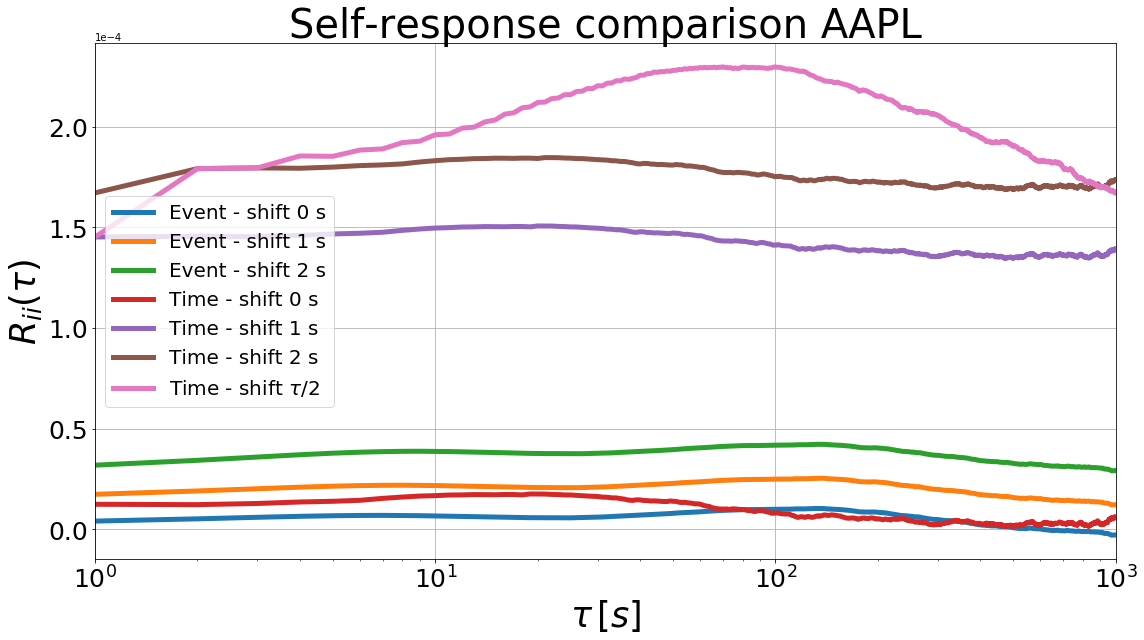

In [3]:
# Test

ticker = 'AAPL'
year = '2008'
shifts = [0, 1, 2]
taq_self_response_year_avg_comparison_plot(ticker, year, shifts)

## Cross-response

In [4]:
def taq_cross_response_year_avg_comparison_plot(ticker_i, ticker_j, year, shifts):
    """
    Plot the average cross response during a month and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
    """

    if (ticker_i == ticker_j):

        return None

    else:

        try:

            figure = plt.figure(figsize=(16, 9))

            for shift in shifts:

                cross = pickle.load(open(''.join((
                            '../taq_data/transactions_responses_data_{2}/'
                            + 'taq_cross_response_year_transactions_responses'
                            + '_data_shift_{3}/taq_cross_response_year'
                            + '_transactions_responses_data_shift_{3}_{2}_{0}i'
                            + '_{1}j.pickle').split())
                            .format(ticker_i, ticker_j, year, shift),
                            'rb'))

                plt.semilogx(cross, linewidth=5, label='Event - shift {} s'
                             .format(shift))

                
            for shift in shifts:

                cross = pickle.load(open(''.join((
                                '../taq_data/responses_shift_data_{2}/taq'
                                + '_cross_response_year_responses_shift_data'
                                + '_shift_{3}/taq_cross_response_year'
                                + '_responses_shift_data_shift_{3}_{2}_{0}i'
                                + '_{1}j.pickle').split())
                                .format(ticker_i, ticker_j, year, shift),
                                'rb'))

                plt.semilogx(cross, linewidth=5, label='Time - shift {} s'
                             .format(shift))

            cross = pickle.load(open(''.join((
                                '../taq_data/responses_shift_data_{2}/taq'
                                + '_cross_response_year_responses_shift_data'
                                + '_shift_tau/taq_cross_response_year'
                                + '_responses_shift_data_shift_tau_{2}_{0}i'
                                + '_{1}j.pickle').split())
                                .format(ticker_i, ticker_j, year), 'rb'))

            plt.semilogx(cross, linewidth=5, label=r'Time - shift $\tau / 2$')
            
            plt.legend(loc='best', fontsize=20)
            plt.title('Cross-response comparison {} - {}'.format(ticker_i,
                      ticker_j), fontsize=40)
            plt.xlabel(r'$\tau \, [s]$', fontsize=35)
            plt.ylabel(r'$R_{ij}(\tau)$', fontsize=35)
            plt.xticks(fontsize=25)
            plt.yticks(fontsize=25)
            plt.xlim(1, 1000)
            # plt.ylim(4 * 10 ** -5, 9 * 10 ** -5)
            plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
            plt.grid(True)
            plt.tight_layout()

            return None

        except FileNotFoundError:
            print('No data')
            print()
            return None

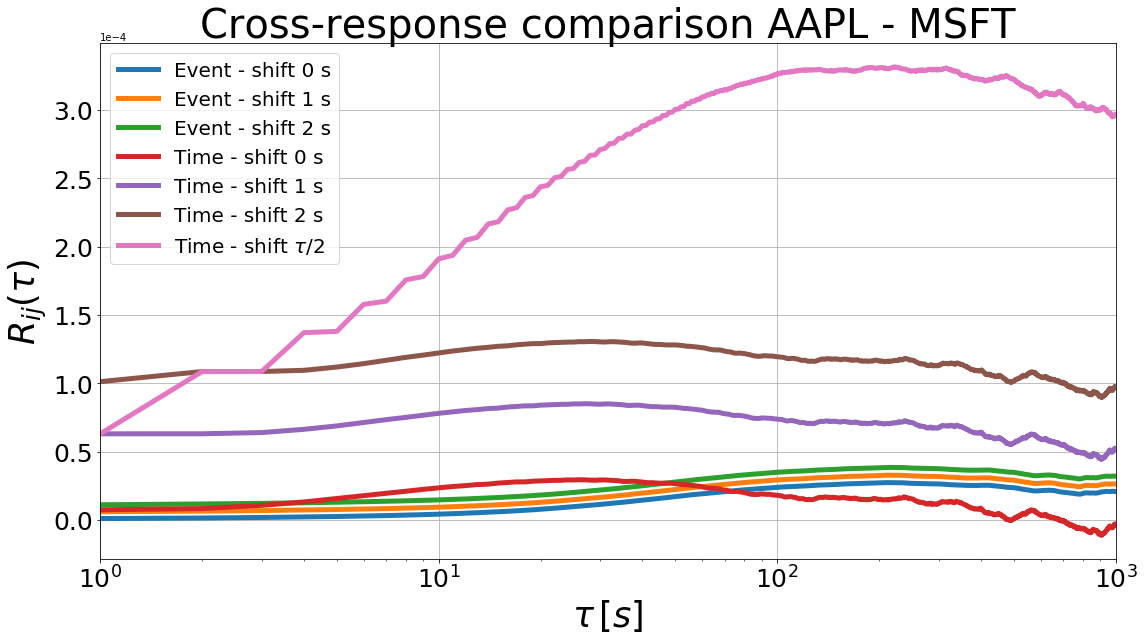

In [5]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
shifts = [0, 1, 2]

taq_cross_response_year_avg_comparison_plot(ticker_i, ticker_j, year, shifts)